AVG VISITS PER TREE PER SECOND:avg. 58.58 visits/tree/s


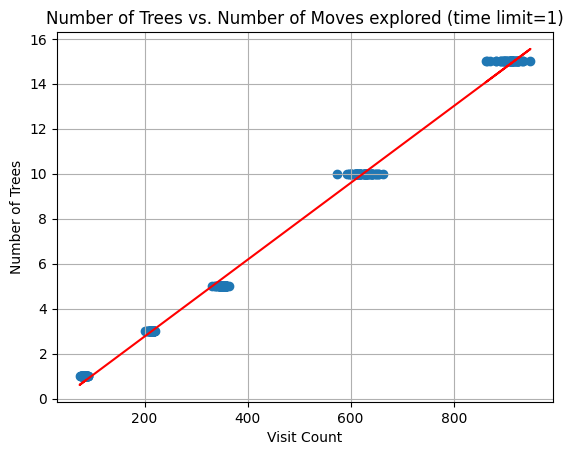

AVG VISITS PER TREE PER SECOND:avg. 57.53 visits/tree/s


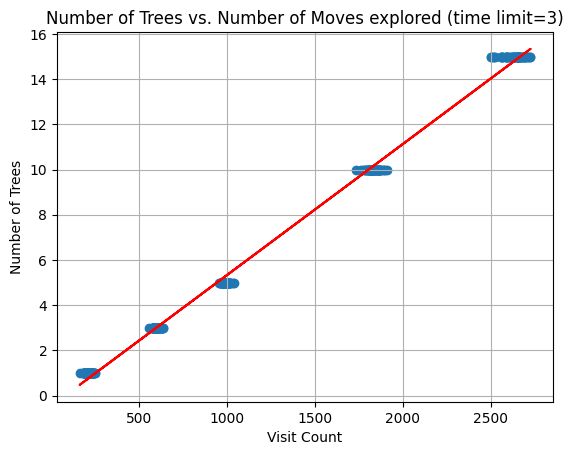

AVG VISITS PER TREE PER SECOND:avg. 54.76 visits/tree/s


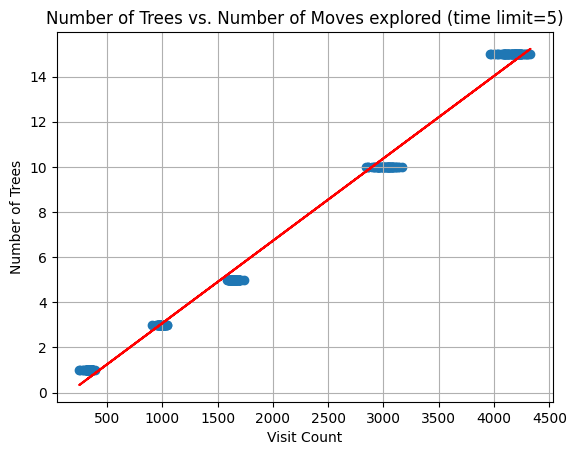

AVG VISITS PER TREE PER SECOND:avg. 64.94 visits/tree/s


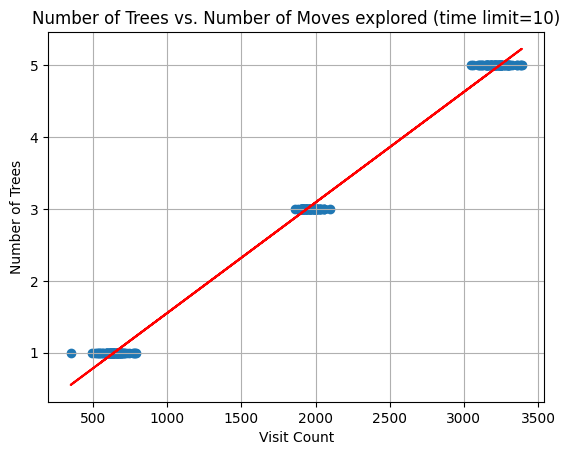

In [8]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Relative path to the JSON file
relative_path = "../results/ultimate_tictactoe/profiling_data.json"
current_dir = os.getcwd()
file_path = os.path.abspath(os.path.join(current_dir, relative_path))
with open(file_path, "r") as f:
    data = json.load(f)

# Separate data by time limit
time_limits = {}
for entry in data:
    time_limit = entry["time_limit"]
    if time_limit not in time_limits:
        time_limits[time_limit] = {"visit_count": [], "num_trees": []}
    time_limits[time_limit]["visit_count"].append(entry["visit_count"])
    time_limits[time_limit]["num_trees"].append(entry["num_trees"])

# Plot scatter plots and linear regression for each time limit
for time_limit, values in time_limits.items():
    visit_count = values["visit_count"]
    num_trees = values["num_trees"]

    # Convert to numpy arrays for regression
    visit_count = np.array(visit_count).reshape(-1, 1)
    num_trees = np.array(num_trees)

    # Scatter plot
    plt.scatter(visit_count, num_trees, label=f"Time Limit: {time_limit}")

    # Linear regression
    model = LinearRegression()
    model.fit(visit_count, num_trees)
    predicted_num_trees = model.predict(visit_count)
    # Get the coefficient of direction (slope) and intercept
    coefficient_of_direction = model.coef_[0]
    intercept = model.intercept_

    # Construct the formula for the regression line
    formula = f"avg. {1.0/(coefficient_of_direction*time_limit):.2f} visits/tree/s"

    #
    # Plot the regression line
    plt.plot(visit_count, predicted_num_trees, color="red", linestyle="-")
    print(f"AVG VISITS PER TREE PER SECOND:{formula}")
    plt.xlabel("Visit Count")
    plt.ylabel("Number of Trees")
    plt.title(f"Number of Trees vs. Number of Moves explored (time limit={time_limit})")
    # plt.legend()
    plt.grid(True)
    plt.show()

AVG SECONDS PER VISIT PER TREE: avg. 61.04 visits/tree/second


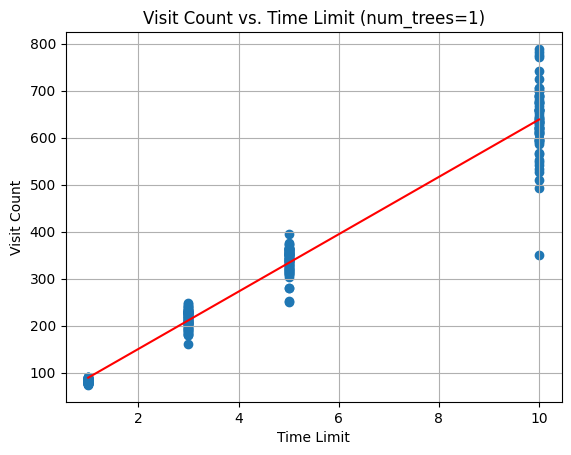

AVG SECONDS PER VISIT PER TREE: avg. 64.92 visits/tree/second


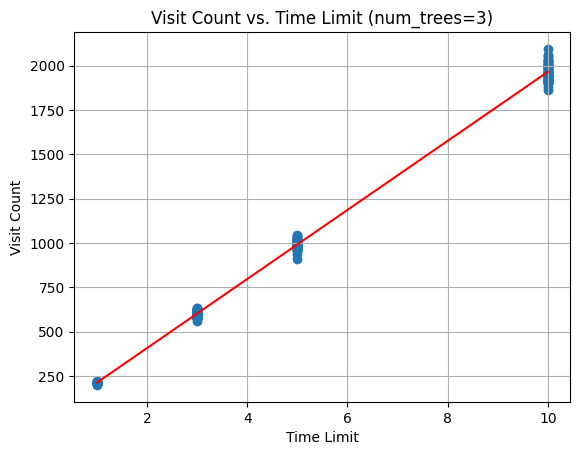

AVG SECONDS PER VISIT PER TREE: avg. 63.80 visits/tree/second


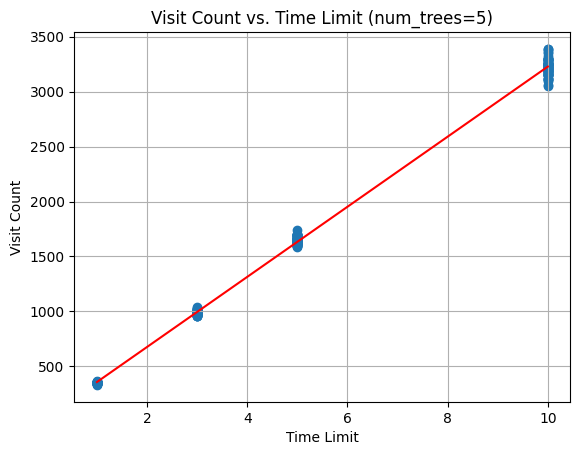

AVG SECONDS PER VISIT PER TREE: avg. 59.71 visits/tree/second


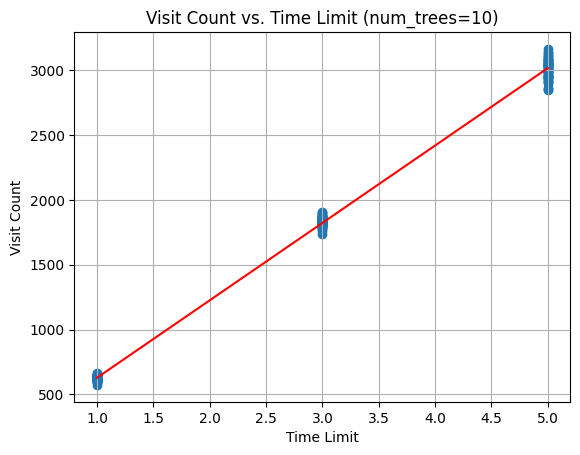

AVG SECONDS PER VISIT PER TREE: avg. 54.24 visits/tree/second


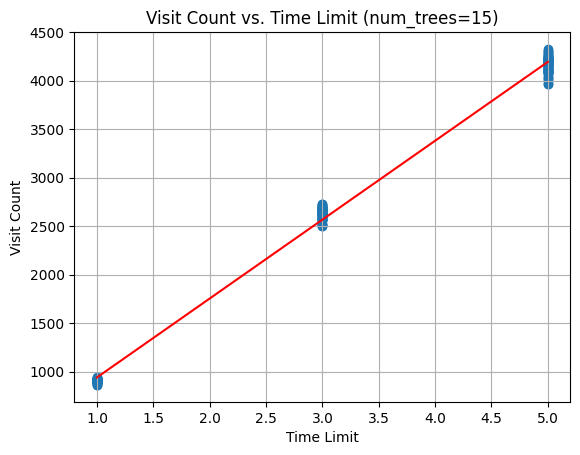

In [18]:
# Plot scatter plots and linear regression for each num_trees group
for num_trees, values in num_trees_data.items():
    visit_count = values["visit_count"]
    time_limits = values["time_limit"]

    # Convert to numpy arrays for regression
    visit_count = np.array(visit_count).reshape(-1, 1)
    time_limits = np.array(time_limits).reshape(-1, 1)

    # Scatter plot
    plt.scatter(time_limits, visit_count, label=f"Number of Trees: {num_trees}")

    # Linear regression
    model = LinearRegression()
    model.fit(time_limits, visit_count)

    predicted_visit_count = model.predict(time_limits)

    # Get the coefficient of direction (slope) from the linear model
    coefficient_of_direction = model.coef_[0][0]

    # Calculate the average seconds per visit per tree
    avg_seconds_per_visit_per_tree = 1.0 * coefficient_of_direction / num_trees

    # Construct the formula for the regression line
    formula = f"avg. {avg_seconds_per_visit_per_tree:.2f} visits/tree/second"

    # Plot the regression line
    plt.plot(time_limits, predicted_visit_count, color="red", linestyle="-")
    print(f"AVG SECONDS PER VISIT PER TREE: {formula}")
    plt.xlabel("Time Limit")
    plt.ylabel("Visit Count")
    plt.title(f"Visit Count vs. Time Limit (num_trees={num_trees})")
    plt.grid(True)
    plt.show()